In [0]:
# https://reurl.cc/XrMQM
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["ans"] = iris["target"]
df

In [10]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)
cluster.fit(iris["data"])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
df["cluster"] = cluster.labels_
df

In [11]:
cluster.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

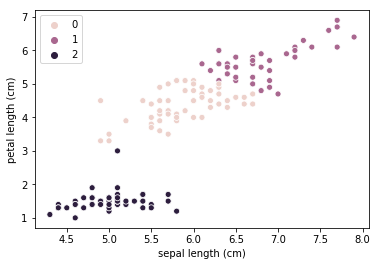

In [9]:
# https://seaborn.pydata.org/api.html
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
x = df[ ["sepal length (cm)", "petal length (cm)"] ]
cluster = KMeans(n_clusters=3)
cluster.fit(x)
sns.scatterplot(df["sepal length (cm)"], df["petal length (cm)"],
                hue=cluster.labels_)

In [17]:
from sklearn.metrics import silhouette_score
xs = []
ys = []
for k in range(2, 10):
  cluster = KMeans(n_clusters=k)
  cluster.fit(iris["data"])
  score = silhouette_score(iris["data"], cluster.labels_)
  xs.append(k)
  ys.append(score)
print(xs)
print(ys)

[2, 3, 4, 5, 6, 7, 8, 9]
[0.681046169211746, 0.5528190123564091, 0.4980505049972867, 0.4887488870931048, 0.3678464984712235, 0.3390171929976829, 0.33816584648484466, 0.3193251955690218]


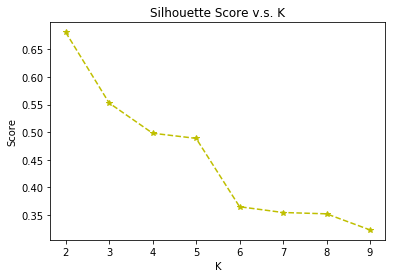

In [16]:
plt.title("Silhouette Score v.s. K")
plt.xlabel("K")
plt.ylabel("Score")
plt.plot(xs, ys, "*--y")